# Demonstration 1: Open Field

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sisyphus.envs import OpenField
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

## Value Iteration

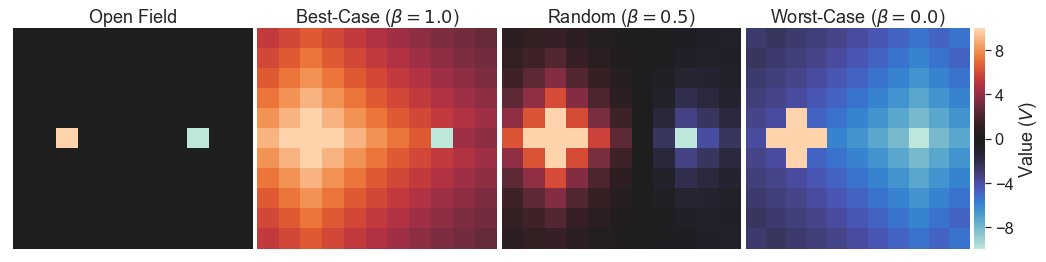

In [2]:
from sisyphus import ValueIteration

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Value Iteration.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize environment.
gym = OpenField()

V = np.zeros((3,*gym.shape))
for i, beta in enumerate([1.0,0.5,0.0]):
    
    ## Initialize value iteration.
    qvi = ValueIteration(policy='betamax', gamma=0.9, beta=beta)
    
    ## Solve for Q-values.
    qvi = qvi.fit(gym)
    V[i] = qvi.V.reshape(gym.shape)
    
## Fill in terminal states.
V[:,5,[2,-3]] = [10, -10]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
## Initialize figure.
fig = plt.figure(figsize=(15,3.5))

## Initialize plots and divider.
gs = gridspec.GridSpec(1,4)
gs.update(left=0.05, right=0.95, bottom=0.025, top=0.9, hspace=0, wspace=0.02)

## Plot environment.
R = np.zeros((gym.shape))
R[5,[2,-3]] = [10, -10]
ax = plt.subplot(gs[0])
sns.heatmap(R, center=0, vmin=-10, vmax=10, cbar=False,
            xticklabels=[], yticklabels=[], ax=ax)
ax.set_title(r'Open Field')

## Plot best-case learning (beta = 1).
ax = plt.subplot(gs[1])
sns.heatmap(V[0], center=0, vmin=-10, vmax=10, cbar=False,
            xticklabels=[], yticklabels=[], ax=ax)
ax.set_title(r'Best-Case ($\beta=1.0$)')

## Plot random learning (beta = 0.5).
ax = plt.subplot(gs[2])
sns.heatmap(V[1], center=0, vmin=-10, vmax=10, cbar=False, 
            xticklabels=[], yticklabels=[], ax=ax)
ax.set_title(r'Random ($\beta=0.5$)')

## Plot worst-case learning (beta = 0.0).
ax = plt.subplot(gs[3])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
sns.heatmap(V[2], center=0, vmin=-10, vmax=10, cbar=True,
            xticklabels=[], yticklabels=[], ax=ax, cbar_ax=cax)
ax.set_title(r'Worst-Case ($\beta=0.0$)')

## Update colorbar.
cbar = ax.collections[0].colorbar
cbar.set_label(r'Value ($V$)')

plt.savefig('figures/01_field.png', dpi=180)